# Qn 2a

In [1]:
import csv
from sqlalchemy import create_engine, Column, String, Integer, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship

engine = create_engine('sqlite:///2a.db', echo=False)
Session = sessionmaker(bind=engine)
session = Session()

Base = declarative_base()

class People(Base):
    __tablename__ = 'people'
    person_id = Column('index', String, primary_key=True)
    person_name = Column('name', String)
    
    def __init__(self, index, name):
        self.person_id = index
        self.person_name = name
        
    def __repr__(self):
        return "%s %s" %(self.person_id, self.person_name)
        
class Acquaintance(Base):
    __tablename__ = 'acquaintance'
    column_id = Column('id', Integer, primary_key=True, autoincrement=True)
    from_column = Column('from', String, ForeignKey('people.index'))
    to_column = Column('to', String, ForeignKey('people.index'))
    foreignkey_from = relationship('People', foreign_keys=[from_column])
    foreignkey_to = relationship('People', foreign_keys=[to_column])
    
    def __init__(self, from_column=None, to_column=None):
        self.from_column = from_column
        self.to_column = to_column
        
    def __repr__(self):
        return "%s %s %s" %(self.column_id,self.from_column, self.to_column)

Base.metadata.create_all(engine)


with open('people.csv') as p:
    reader = csv.reader(p)
    header = next(reader)
    for row in reader:
        person = People(index = row[0], name = row[1])
        session.add(person)
    
with open('acquaintance.csv') as a:
    reader = csv.reader(a)
    header = next(reader)
    for row in reader:
        acq = Acquaintance(from_column = row[0], to_column = row[1])
        session.add(acq)
    
session.commit()

### 2a) Relationship between People and Acquaintance Table is One to Many

# Qn 2b

In [2]:
def getAcquaintancesNameByPersonID(personID):
    acquaintances = session.query(People, Acquaintance).filter(Acquaintance.from_column == personID).filter(People.person_id == Acquaintance.from_column).all()
    if len(acquaintances) == 0:
        print(f'No acquaintances for Person ID: {personID}')
    else:
        for people, acquaintance in acquaintances:
            acquaintance_names = session.query(People).filter(People.person_id == acquaintance.to_column).limit(1).all()
            print (acquaintance_names[0].person_name)
            

getAcquaintancesNameByPersonID('PERSON_0000000000')

Catherine Thomas
Bruce Vaughn
Kimberly Carter
Matthew Lopez
Eric Burns
Laura Hughes
James Coffey
Kenneth Hernandez
Megan Castillo
Megan Smith
Duane Herring
Tiffany Sanchez
Christian Payne
James Campbell


## Qn c(i)

In [3]:
from sqlalchemy import func
acquaintance_count = session.query(Acquaintance.from_column, func.count(Acquaintance.from_column)).group_by(Acquaintance.from_column).all()

for i in acquaintance_count:
    print(f'Person: {i[0]} Number of Acquaintances: {i[1]}')

Person: PERSON_0000000000 Number of Acquaintances: 14
Person: PERSON_0000000001 Number of Acquaintances: 12
Person: PERSON_0000000002 Number of Acquaintances: 18
Person: PERSON_0000000003 Number of Acquaintances: 13
Person: PERSON_0000000004 Number of Acquaintances: 19
Person: PERSON_0000000005 Number of Acquaintances: 23
Person: PERSON_0000000006 Number of Acquaintances: 22
Person: PERSON_0000000007 Number of Acquaintances: 15
Person: PERSON_0000000008 Number of Acquaintances: 17
Person: PERSON_0000000009 Number of Acquaintances: 14
Person: PERSON_0000000010 Number of Acquaintances: 16
Person: PERSON_0000000011 Number of Acquaintances: 27
Person: PERSON_0000000012 Number of Acquaintances: 18
Person: PERSON_0000000013 Number of Acquaintances: 24
Person: PERSON_0000000014 Number of Acquaintances: 14
Person: PERSON_0000000015 Number of Acquaintances: 21
Person: PERSON_0000000016 Number of Acquaintances: 15
Person: PERSON_0000000017 Number of Acquaintances: 12
Person: PERSON_0000000018 Nu

## Qn c(ii)

In [4]:
import pandas as pd
df = pd.DataFrame(acquaintance_count,columns=['person', 'count'])
display(df)

,person,count
0,PERSON_0000000000,14
1,PERSON_0000000001,12
2,PERSON_0000000002,18
3,PERSON_0000000003,13
4,PERSON_0000000004,19
...,...,...
995,PERSON_0000000995,20
996,PERSON_0000000996,17
997,PERSON_0000000997,18
998,PERSON_0000000998,14


Text(0.5, 1.0, 'Distribution of number of acquaintances per person')

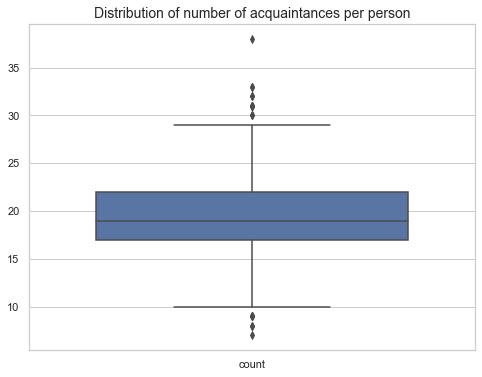

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
g = sns.boxplot(data=df, width=0.7)
#Title
plt.title('Distribution of number of acquaintances per person', fontsize=14)


## Qn d

In [6]:
subq = session.query(Acquaintance.from_column, func.count(Acquaintance.from_column).label('count')).group_by(Acquaintance.from_column).all()

highestacq = max(subq,key=lambda item:item[1])

name = session.query(People).filter(People.person_id == highestacq[0])
for i in name:
    getname = i

print(f'{getname} {highestacq[1]}')

PERSON_0000000120 George Anderson 38


## Qn e

In [7]:
#create acquaintance dictionary
acquaintance_dict = {}
result = session.query(Acquaintance)
for r in (result):
    if r.from_column in acquaintance_dict:
        acquaintance_dict[r.from_column].append(r.to_column)
    else:
        acquaintance_dict[r.from_column] = [r.to_column]


#find group of 3 acquaintances

three_distinct_acquaintances = []

for key,value in acquaintance_dict.items():
    first_person = key 
    for values in acquaintance_dict[key]: 
        if first_person in acquaintance_dict[values]: 
            second_person = values
            for values in acquaintance_dict[second_person]: 
                if (first_person in acquaintance_dict[values]) and (second_person in acquaintance_dict[values]):
                    third_person = values 
                    three_distinct_acquaintances.append([first_person, second_person, third_person])
                    

empty_list = []
for i in three_distinct_acquaintances: 
    i.sort()
    
for i in three_distinct_acquaintances:
    if i not in empty_list:
        empty_list.append(i)
        
for group in empty_list:
    print(group)

['PERSON_0000000060', 'PERSON_0000000528', 'PERSON_0000000779']
['PERSON_0000000060', 'PERSON_0000000076', 'PERSON_0000000779']
['PERSON_0000000060', 'PERSON_0000000558', 'PERSON_0000000857']
['PERSON_0000000060', 'PERSON_0000000087', 'PERSON_0000000966']
['PERSON_0000000060', 'PERSON_0000000076', 'PERSON_0000000178']
['PERSON_0000000060', 'PERSON_0000000068', 'PERSON_0000000319']
['PERSON_0000000417', 'PERSON_0000000549', 'PERSON_0000000914']
['PERSON_0000000152', 'PERSON_0000000824', 'PERSON_0000000981']
['PERSON_0000000623', 'PERSON_0000000824', 'PERSON_0000000993']
['PERSON_0000000152', 'PERSON_0000000265', 'PERSON_0000000824']
['PERSON_0000000191', 'PERSON_0000000623', 'PERSON_0000000824']
['PERSON_0000000331', 'PERSON_0000000796', 'PERSON_0000000824']
['PERSON_0000000543', 'PERSON_0000000574', 'PERSON_0000000753']
['PERSON_0000000574', 'PERSON_0000000638', 'PERSON_0000000753']
['PERSON_0000000057', 'PERSON_0000000228', 'PERSON_0000000702']
['PERSON_0000000057', 'PERSON_0000000338